In [141]:
import os

import json
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

import random

In [107]:
pwd

'/home/dev/other/fsp/tts-king/dataset_review'

In [106]:
data = pd.read_csv('/home/dev/other/fsp/data/speaker_stats.csv', delimiter='|')

In [107]:
counts = data.groupby('speaker_id').sum('num_sentences').sort_values('num_sentences', ascending=False)['num_sentences']

In [110]:
data['num_sentences'].shape

(249,)

Text(0.5, 1.0, 'Least 20 speakers by number of sentences')

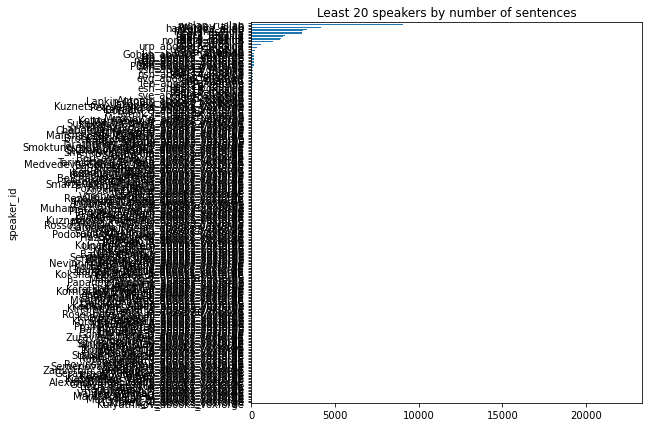

In [108]:
data.groupby('speaker_id').sum('num_sentences').sort_values('num_sentences', ascending=True)['num_sentences'].plot(kind='barh', figsize=(7,7))
plt.title('Least 20 speakers by number of sentences')

In [112]:
speakers_long = data[data['num_sentences'] > 200]['speaker_id'].to_list()
len(speakers_long)

19

In [109]:
speakers_long = ['ruslan_ruslan']

In [83]:
speakers_noisy = []

with open('./speakers_to_remove.txt', 'r') as f:
    for s in f.readlines():
        speakers_noisy.append(s.replace('\n',''))

In [84]:
speakers_to_remove = set(speakers_noisy+ speakers_short)
len(speakers_to_remove)

183

In [94]:
all_speakers = set(data['speaker_id'].to_list())
len(all_speakers)

249

In [86]:
with open('./speakers_to_remove.txt', 'w') as f:
    for s in speakers_to_remove:
        f.write(s+'\n')

In [146]:
with open('/home/dev/other/fsp/data/dataset_main/processed/old_train/train_orig.txt', 'r') as f:
    train = f.read().split('\n')
    
with open('/home/dev/other/fsp/data/dataset_main/processed/old_train/val_orig.txt', 'r') as f:
    val = f.read().split('\n')
    
train += val

In [147]:
len(train)

73310

In [131]:
speakers_to_keep = list(all_speakers.difference(speakers_to_remove))
len(speakers_to_keep)

11

In [133]:
#data[data['speaker_id'].isin(speakers_to_keep)]['num_sentences'].hist()

In [148]:
i = 0

lines = []
for t in train:
    if 'ruslan_ruslan' in t:
        lines.append(t+'\n')
        
len(lines)        

22198

In [149]:
lines[:10]

['014002_RUSLAN|ruslan_ruslan|{Z A T0 E0 M P A I N0 T0 I R0 I S A V A0 L S0 A J0 E0 S0 T0 L0 I V A P R O0 S Y sp J0 E0 S0 T0 Z A K R0 I TSH0 A0 L P A N A J0 I F sp K A G D A0 M N0 E0 D0 E0 N0 G0 I V0 I R N U0 T sp S A M S A N A F P0 I R0 I V0 O0 L}|затем поинтересовался есть ли вопросы  есть  закричал панаев  когда мне деньги вернут самсонов перевел \n',
 '013932_RUSLAN|ruslan_ruslan|{K A K O0 J0 I ZH Y E0 T A B U0 D U SH0 I J0 I sp F0 E0 T sp A V A K U M sp M0 I N0 A0 N0 I S P R A0 SH Y V A J0 sp J0 E0 S0 T0 P R A G R A0 M A}| какое же это будущее  фет аввакум  меня не спрашивай есть программа \n',
 '007107_RUSLAN|ruslan_ruslan|{N A P A L O0 G A J0 G R U D0 I0 J0 I J0 O0 M0 I R TS A0 L0 I O0 R D0 I N A I Z N A TSH0 K0 I0 sp L0 I N D A P0 E0 J0 P S sp V A S K L0 I0 K N U L S A F K0 I N sp M Y0 P A Z D A R O0 V A L0 I S0}|на пологой груди ее мерцали ордена и значки линда пейпс воскликнул савкин мы поздоровались \n',
 '019416_RUSLAN|ruslan_ruslan|{A F TSH0 E0 M S M Y0 S L E0 T A J0 A R G

In [151]:
shuffle(train)

val_size = int(len(lines)*0.1)

val = lines[:val_size]
train = lines[val_size:]


with open('/home/dev/other/fsp/data/dataset_main/processed/train_ruslan.txt', 'w') as f:
    for s in train:
        f.write(s)
        
        
with open('/home/dev/other/fsp/data/dataset_main/processed/val_ruslan.txt', 'w') as f:
    for s in val:
        f.write(s)

In [152]:
print(len(train))

19979


In [139]:
with open('/home/dev/other/fsp/data/dataset_main/processed/speakers.json', 'r') as f:
    d = json.load(f)

In [140]:
new_speakers_json = {s:i for i, s in enumerate(['ruslan_ruslan'])}

In [144]:
with open('/home/dev/other/fsp/data/dataset_main/processed/speakers_short.json', 'w') as f:
    json.dump(new_speakers_json,f)

0 0.0 0
1 0.15 0
2 0.3 0
3 0.44999999999999996 0
4 0.6 0
5 0.75 0
6 0.8999999999999999 0
7 1.05 1
8 1.2 1
9 1.3499999999999999 1
